# Homework 4 Monetary Policy : 
Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain how variables in each set of data are related. Plot each set using the scatter plot function and the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the CPI measure that includes urban items is identified by the code, CPIAUCSL.

Create a correlation matrix plot for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?


In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

First, we must decide what data we want to look at. At this moment, i am interested in seeing how 2020 effected the money supply, given the vast government spending that took place, and inflation, to see if we can visually pick out a correlation. In addition, I want to see CPI and adjusted CPI that doesnt account for the more volatile items like energy and food, because if the 'core' inflation has stayed lower than non-adjusted inflation maybe most of it will be transitory. Finally. I'll look at median personal income in the US compared to mean personal income in the US, to see how those have changed relatively. 

Lets pull our data from the fred first, using pandas datareader. 

In [2]:
start= dt.datetime(1960, 1, 1)
end = dt.datetime.today()


money_supply_data = web.DataReader('BOGMBASE', 'fred', start, end)

In [3]:
cpi_data = web.DataReader('CPIAUCSL', 'fred', start, end)
adjusted_cpi_data = web.DataReader('CPILFESL', 'fred', start, end)
median_income = web.DataReader('MEPAINUSA672N', 'fred', start, end)
mean_income = web.DataReader('MAPAINUSA646N', 'fred', start, end)

In [4]:
money_vs_cpi = pd.DataFrame()
money_vs_cpi['Money Supply'] = money_supply_data['BOGMBASE']
money_vs_cpi['CPI'] = cpi_data['CPIAUCSL']
money_supply_data

,BOGMBASE
DATE,
1960-01-01,50700.0
1960-02-01,49600.0
1960-03-01,49500.0
1960-04-01,49700.0
1960-05-01,49700.0
...,...
2021-04-01,6042100.0
2021-05-01,6041900.0
2021-06-01,6027100.0


I will now plot my money supply vs cpi analysis onto a single plot with multiple y-axes to accound for differences in scale

<ipython-input-16-98dad815acf5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([round(x, 4) for x in vals])


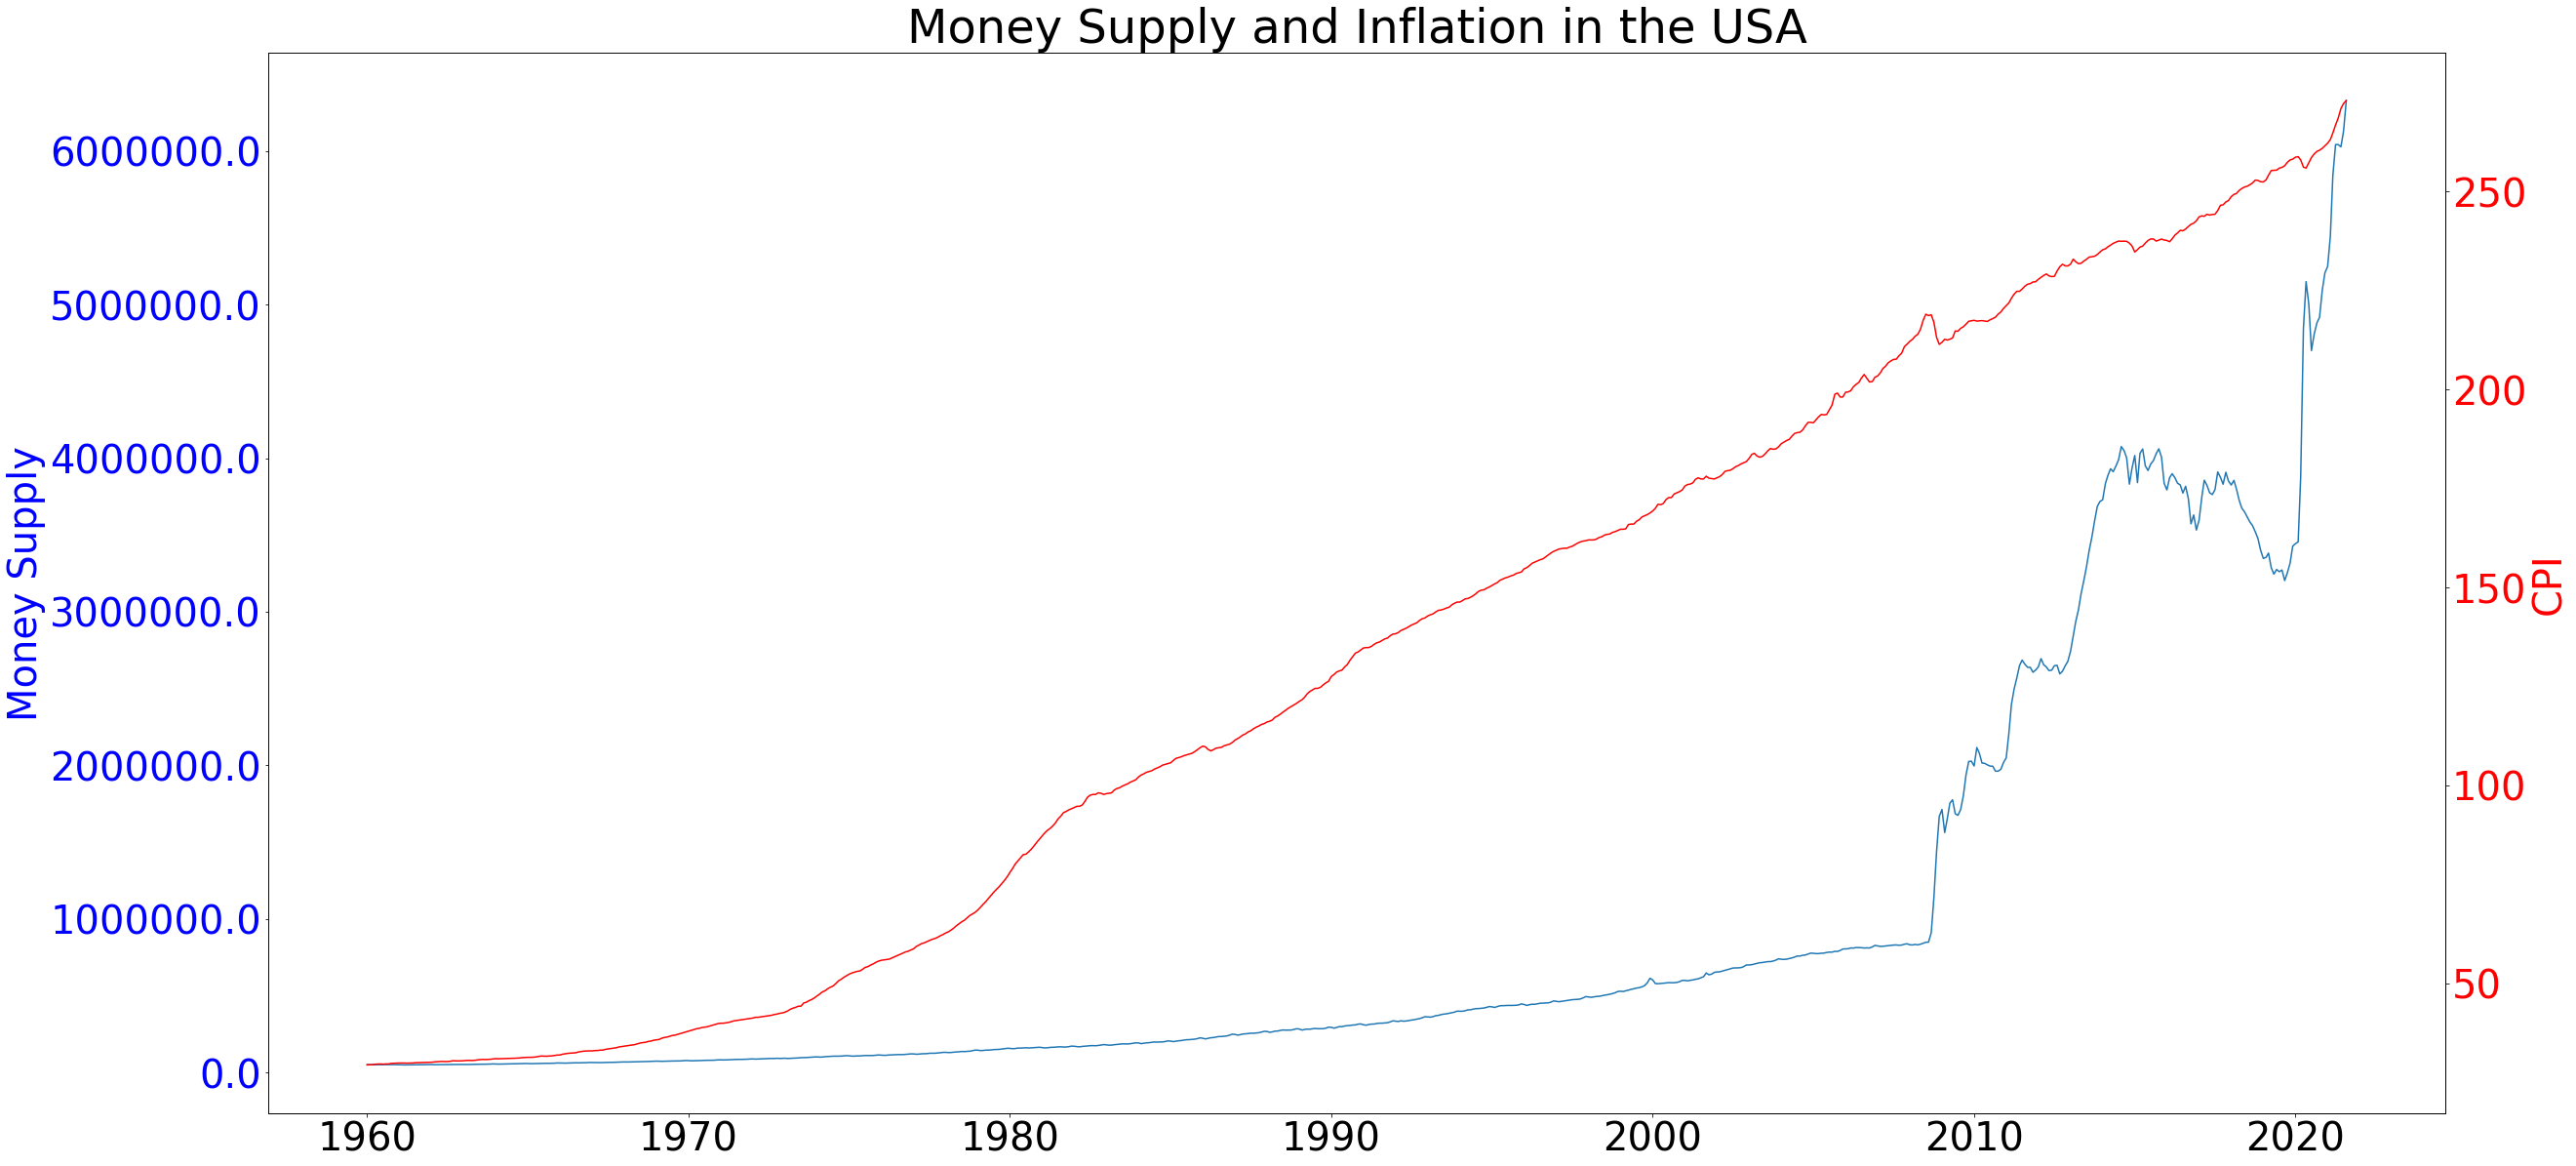

In [16]:
fig, ax = plt.subplots(figsize = (40,20))
plt.rcParams.update({'font.size': 40})
plt.title( 'Money Supply and Inflation in the USA')
y1 = money_vs_cpi['Money Supply']
y2 = money_vs_cpi['CPI']
ax1 = fig.add_subplot(111)
ax1.plot( y1)
ax1.set_ylabel('Money Supply', color = 'b')
vals = ax1.get_yticks()
ax1.set_yticklabels([round(x, 4) for x in vals])
ax.axes.yaxis.set_ticks([])
for val in ax1.get_yticklabels():
    val.set_color('b')
    

ax2 = ax1.twinx()
ax2.plot( y2, 'r-')
ax2.set_ylabel('CPI', color='r')
for val in ax2.get_yticklabels(): 
    val.set_color('r')
ax.axes.xaxis.set_visible(False)



As we can see, the CPI has risen with relative stability, after 1960.  Money supply, on the other hand, has had a very sharp increase since roughly 2009. In fact, I'm interested to know: what proportion of all money in the momey supply has been printed since then? 

In [6]:
money_since_2009 = money_supply_data.loc['2021-01-01'] - money_supply_data.loc['2009-01-01']
percent_money_since_2009 = (money_since_2009 / money_supply_data.loc['2021-01-01']) * 100
percent_money_since_2009

BOGMBASE    67.378049
dtype: float64

So, more than 67 percent of our entire money supply has been created in roughly the last 12 years. Why hasn't inflation been higher? Myabe Dr. Caton has an answer. I dont. 

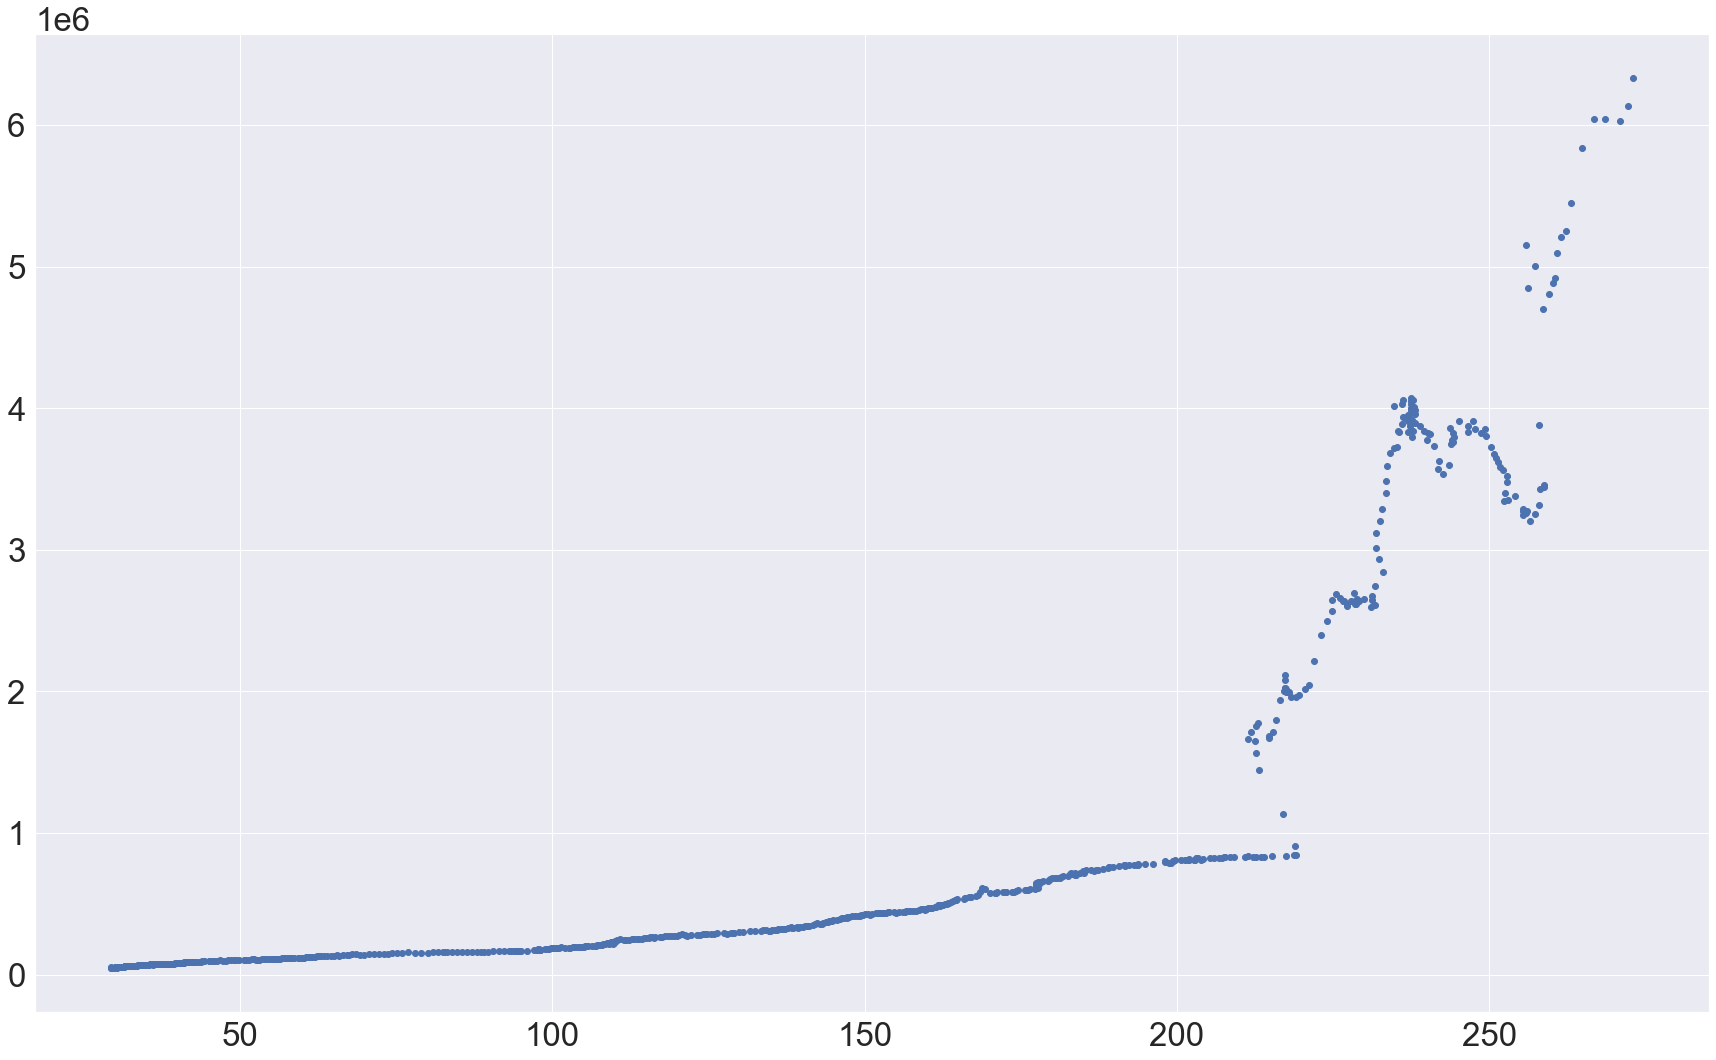

In [54]:
fig, ax = plt.subplots( figsize = (30, 18))
plt.rcParams.update({'font.size':10})
plt.scatter(cpi_dat, money_supply_data)

more correlated recently, but not super correlated overall. Remeber the x=y line is a perfect correlation

Next, I will look at CPI vs Core CPI, which doesnt account for price fluctuations in volatile commodities like gas and food. The idea behind looking at the difference in these two is that if 'normal' CPI is higher than core CPI, then we could reasonably expect the actual prices to come down soon, given how often energy and food prices change. For inflation, we usually loook at the year-to year percent changes in CPI. 

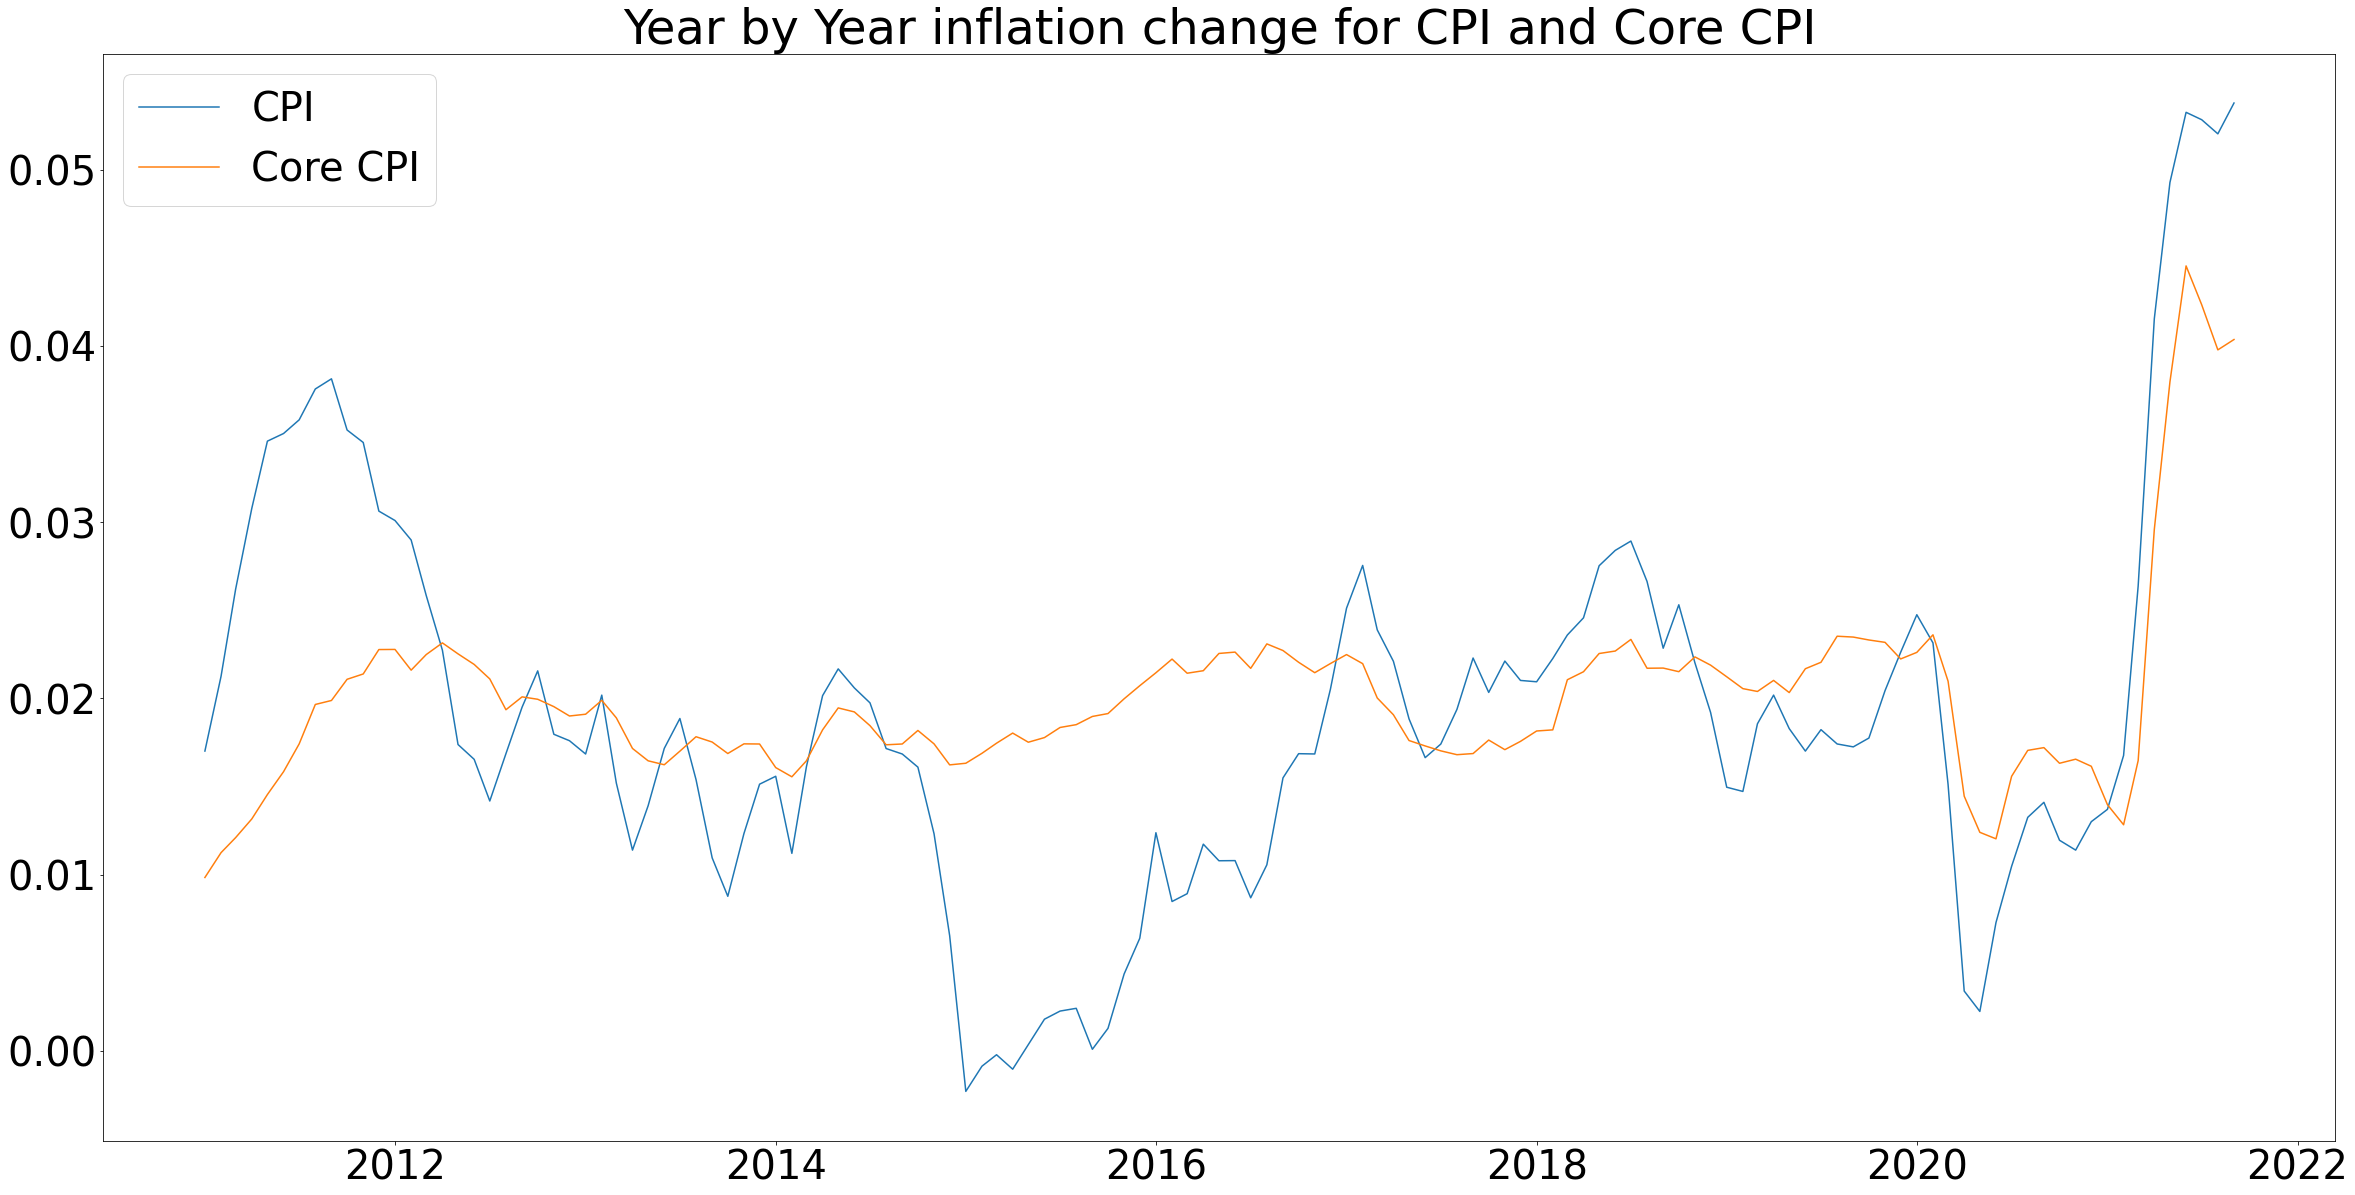

In [17]:
y1 = cpi_data.loc['2010-01-01':].pct_change(periods = 12)
y2 = adjusted_cpi_data['2010-01-01':].pct_change(periods = 12)
fig, ax = plt.subplots( figsize = (40, 20))
plt.rcParams.update({'font.size': 40})
plt.title("Year by Year inflation change for CPI and Core CPI")
ax.plot(y1, label = 'CPI')
ax.plot(y2, label = 'Core CPI')
plt.legend()

As we can see, Core CPI is generally more stable than regular CPI. Towards the current day, they seem to be diverging a bit, but both are elevated. We need more data to determine to what degree this current inflation cycle is transitory.  

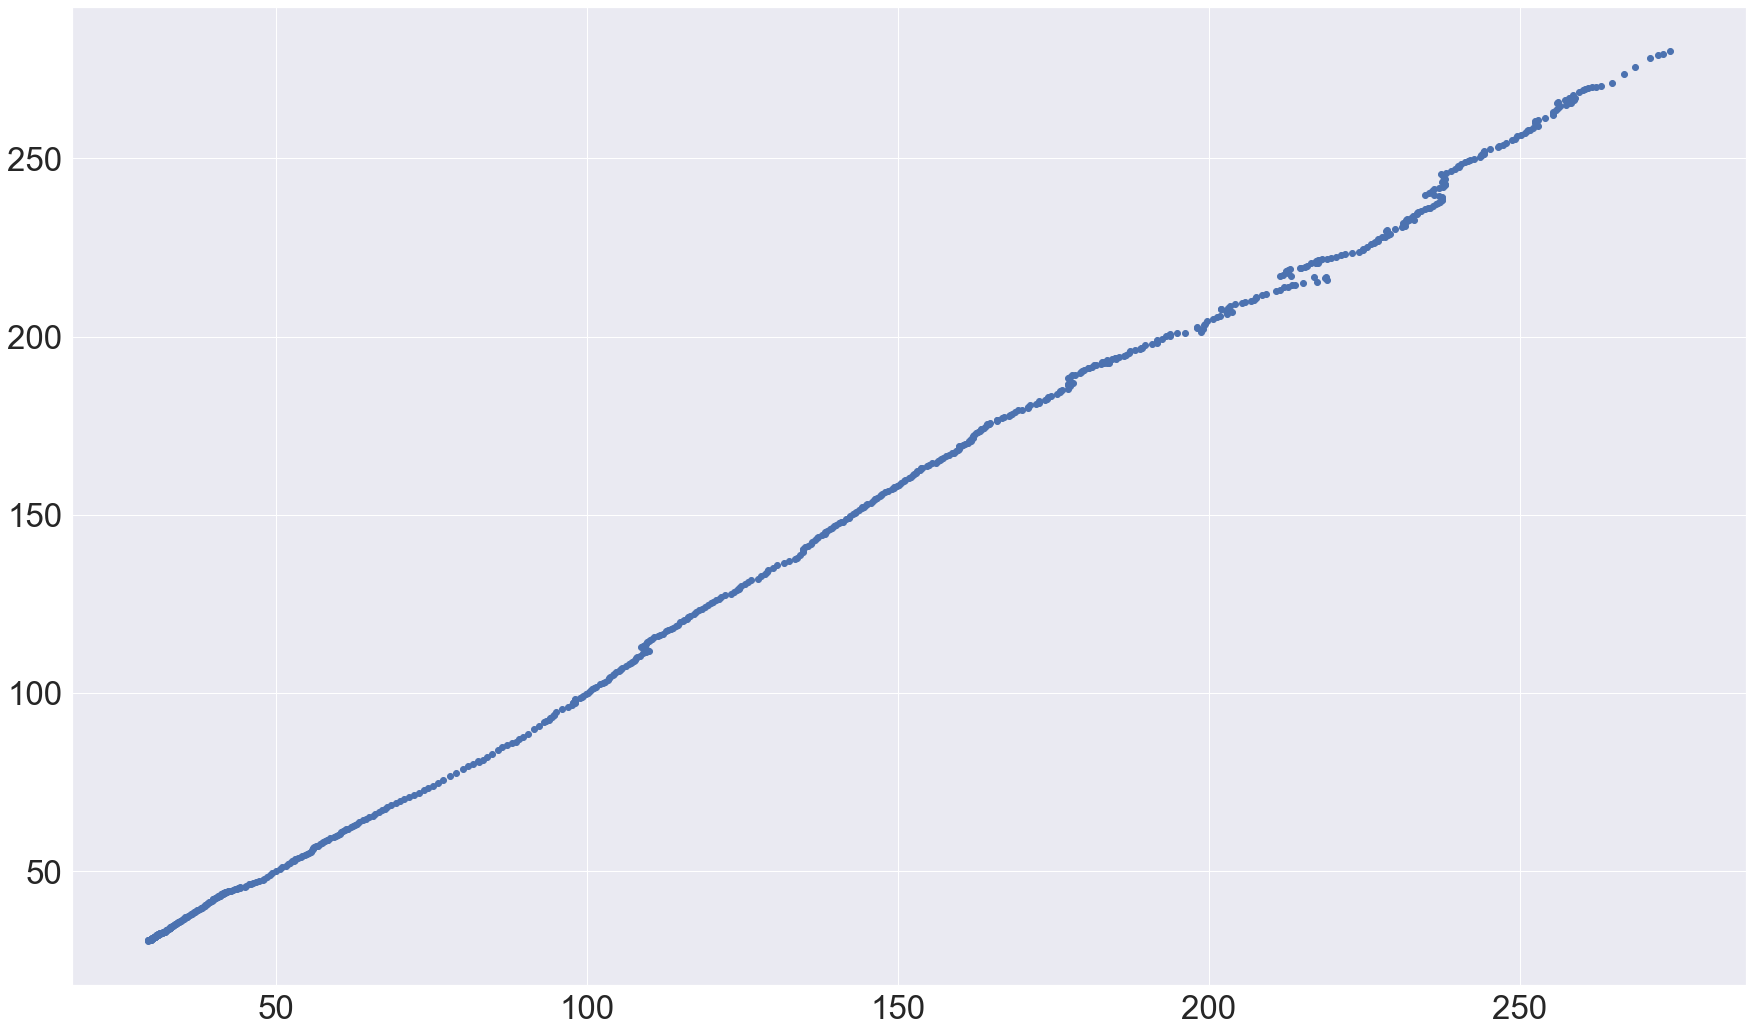

In [55]:
fig, ax = plt.subplots( figsize = (30, 18))
plt.rcParams.update({'font.size':10})
plt.scatter(cpi_data, adjusted_cpi_data)

near-perfect correlation.

Finally, I'd like to look at median personal income in the US vs mean personal income in the US. If these two diverge, that would suggest that the variance of income in the US is increasing, with more folks at the top of the income spectrum holding a higher percentage of the wealth. So, for fun, I'll actually throw that metic into our graph as well. These are NOT direct causal relationships, I just find them interesting. 

In [8]:
wealth_top_percent = web.DataReader('WFRBST01134', 'fred', start, end)

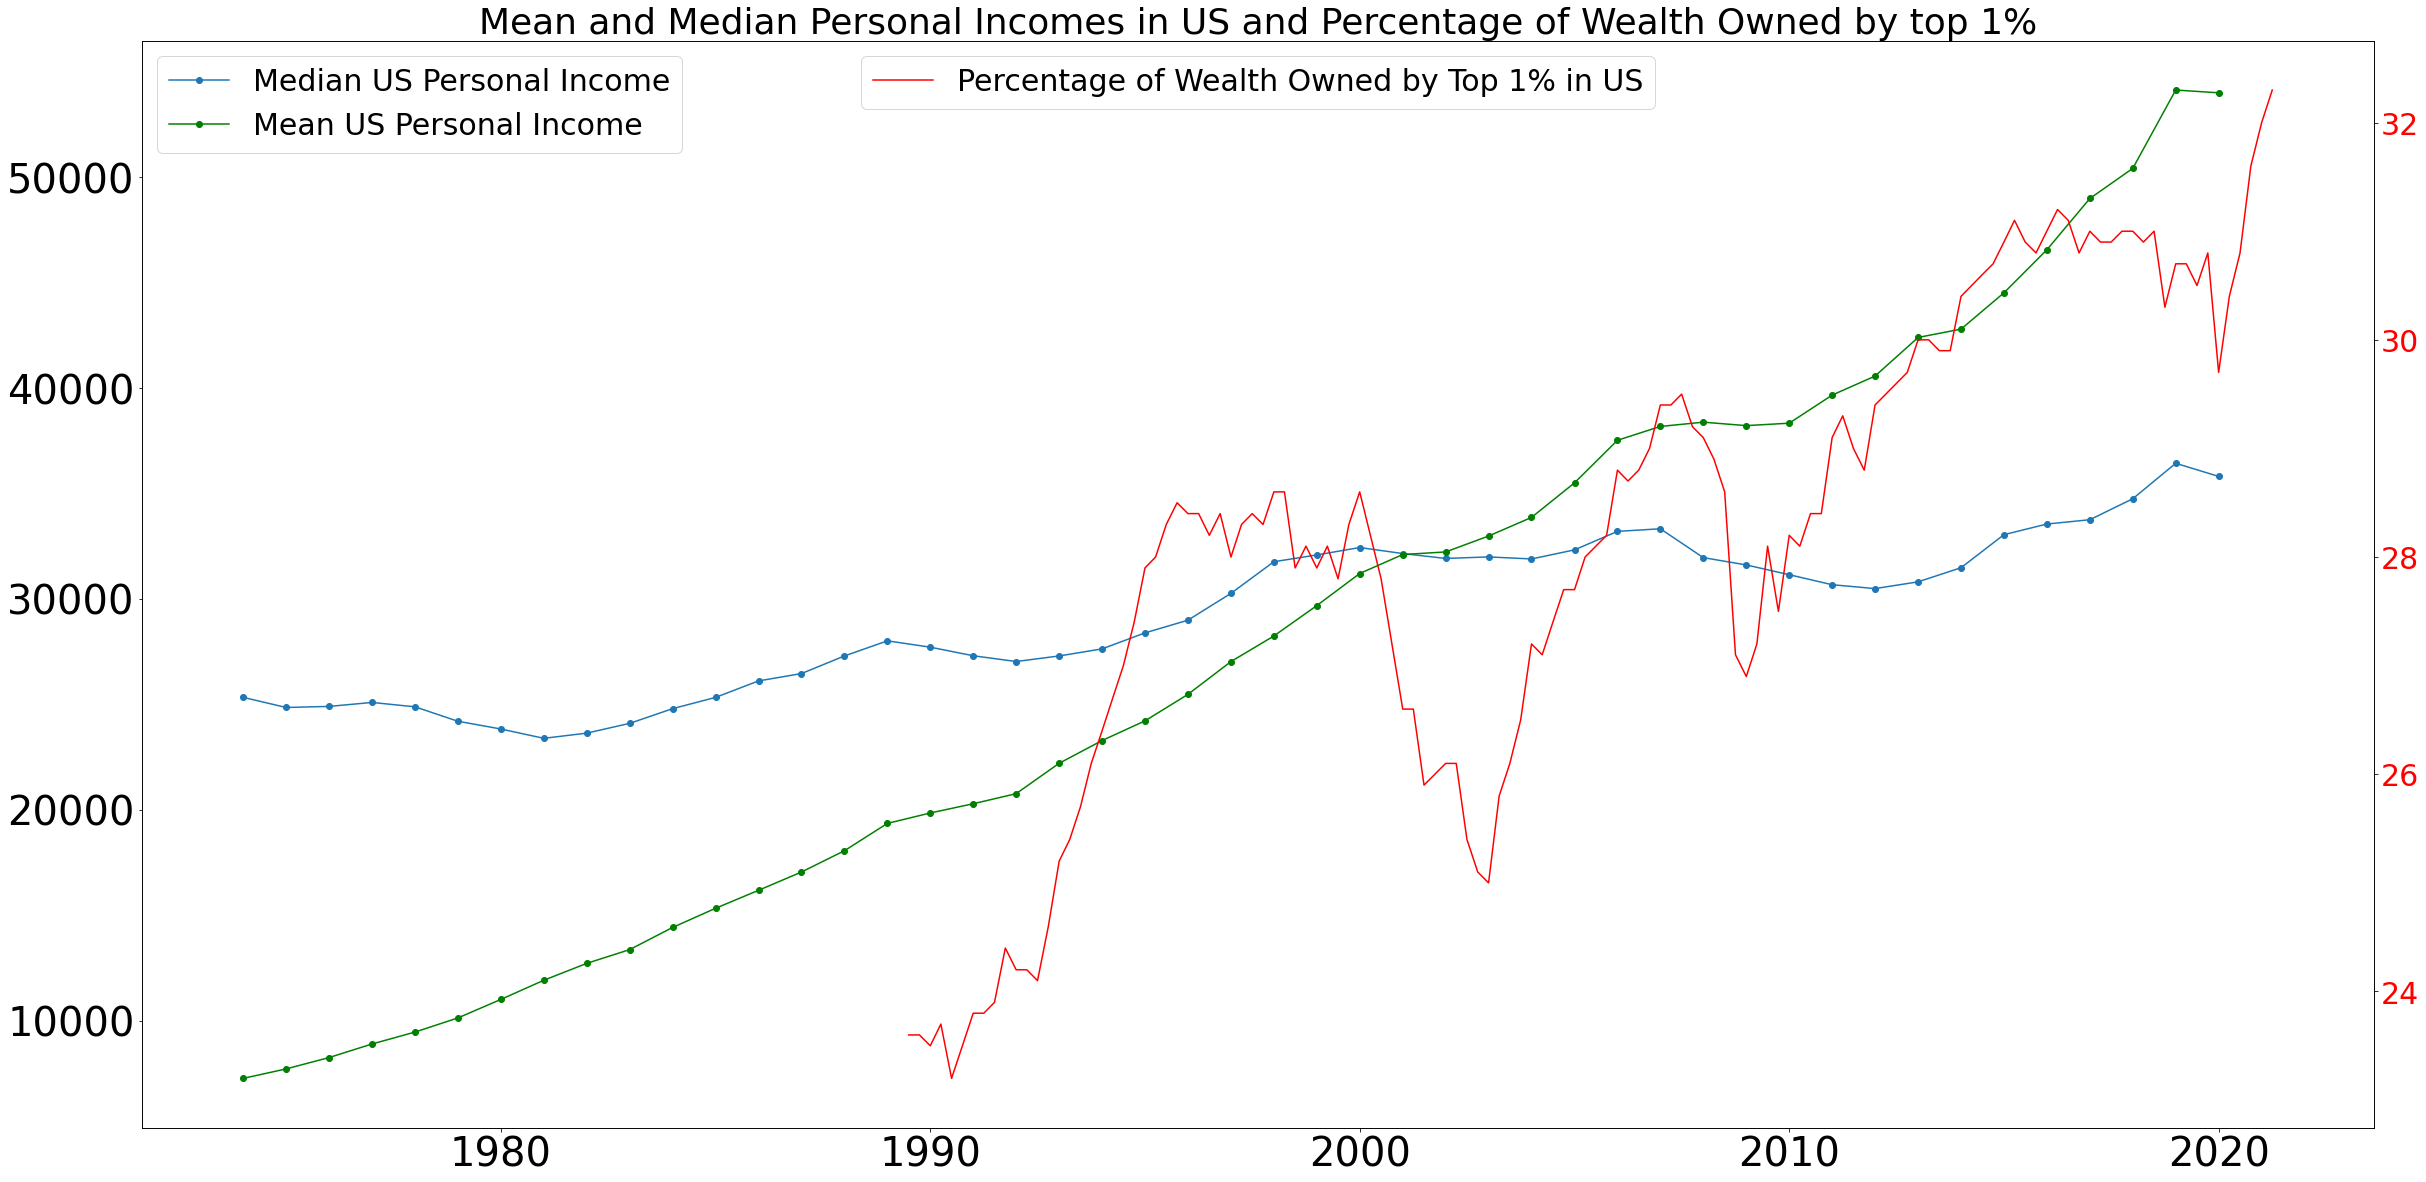

In [19]:
y1 = median_income 
y2 = mean_income
y3 = wealth_top_percent
fig, ax = plt.subplots( figsize = (40, 20))
plt.rcParams.update({'font.size': 30})
plt.title('Mean and Median Personal Incomes in US and Percentage of Wealth Owned by top 1%')
ax.plot(y1, label = 'Median US Personal Income', marker = 'o')
ax.plot(y2, label = 'Mean US Personal Income', c = 'g', marker = 'o')
ax1 = ax.twinx()
ax1.plot(y3, label = 'Percentage of Wealth Owned by Top 1% in US', color = 'r')
vals = ax1.get_yticklabels()
for x in vals: 
    x.set_color('r')
    
ax.legend()
plt.legend(loc = 'upper center')

This is an interesting graph. A few observations: 
1) 2000 was the first time that the mean personal income was higher than the median and therefore a majority of americans made less than the averge. 

2) The dot come recessions and housing crisis recessions caused the share of wealth in the top 1% to go down, but the COVID-19 recession did not. 

3) The median has grown much slower than the mean, and to be honest, it doesnt seem like it has changed much sice 1980 compared to the mean. 

These observations come from the power of data visualization. 

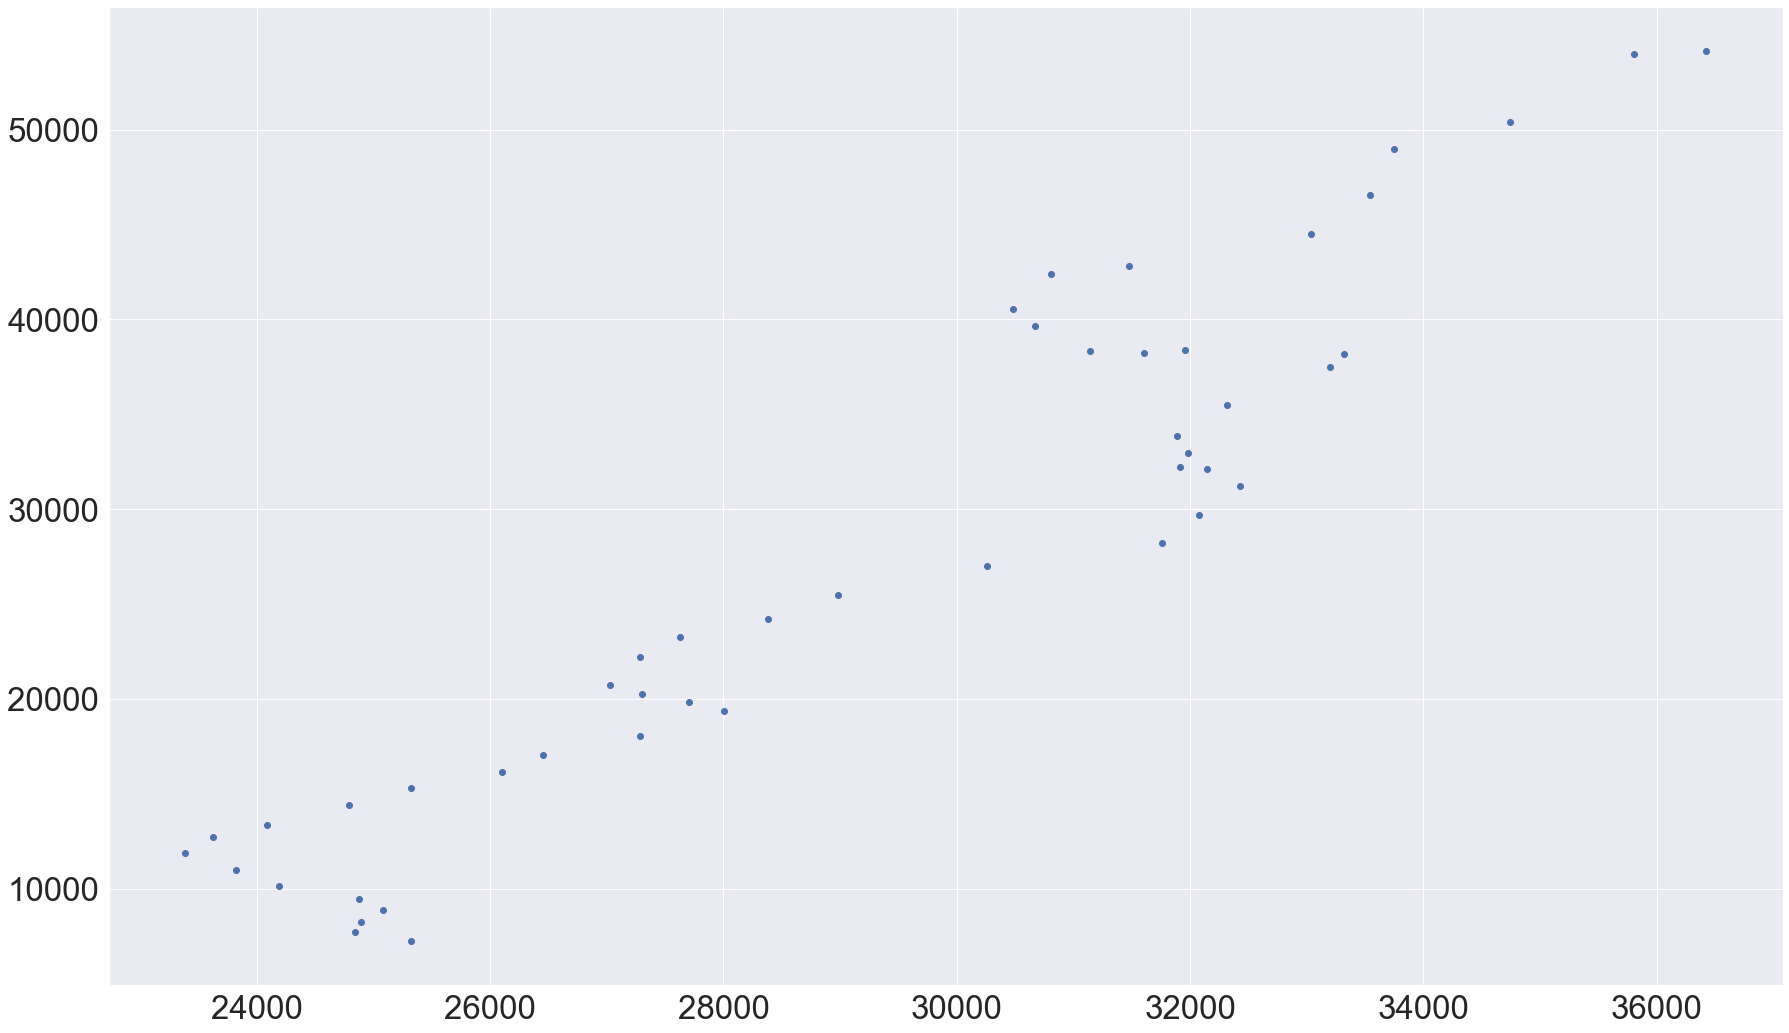

In [56]:
fig, ax = plt.subplots( figsize = (30, 18))
plt.rcParams.update({'font.size':10})
plt.scatter(y1, y2)

# Part 2: 
Create a correlation matrix plot for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

In [10]:
nom_gdp = web.DataReader('GDP', 'fred', start, end)
real_gdp = web.DataReader('GDPC1', 'fred', start, end)
cpi_data = cpi_data
money_supply_data = money_supply_data

In [13]:
econ_df = pd.DataFrame()
econ_df['Nominal GDP'] = nom_gdp['GDP']
econ_df['Real GDP'] = real_gdp['GDPC1']
econ_df['CPI'] = cpi_data['CPIAUCSL']
econ_df['Money Supply'] = money_supply_data['BOGMBASE']
econ_df

,Nominal GDP,Real GDP,CPI,Money Supply
DATE,,,,
1960-01-01,542.648,3277.847,29.370,50700.0
1960-04-01,541.080,3260.177,29.540,49700.0
1960-07-01,545.604,3276.133,29.550,50500.0
1960-10-01,540.197,3234.087,29.750,50100.0
1961-01-01,545.018,3255.914,29.840,49100.0
...,...,...,...,...
2020-04-01,19477.444,17258.205,256.192,4844900.0
2020-07-01,21138.574,18560.774,258.604,4700300.0
2020-10-01,21477.597,18767.778,260.462,4917100.0


In [20]:
nom_gdp = nom_gdp.pct_change(periods = 4) # 4 beacuse data is quarterly 
real_gdp = real_gdp.pct_change(periods = 4)
cpi = cpi_data.pct_change(periods = 12)  # 12 because data is monthly
money_supply = money_supply_data.pct_change(periods = 12)

In [21]:
econ_df_pct_change = pd.DataFrame()
econ_df_pct_change['Nominal GDP'] = nom_gdp['GDP']
econ_df_pct_change['Real GDP'] = real_gdp['GDPC1']
econ_df_pct_change['CPI'] = cpi['CPIAUCSL']
econ_df_pct_change['Money Supply'] = money_supply['BOGMBASE']
econ_df_pct_change

,Nominal GDP,Real GDP,CPI,Money Supply
DATE,,,,
1960-01-01,NaN,NaN,NaN,NaN
1960-04-01,NaN,NaN,NaN,NaN
1960-07-01,NaN,NaN,NaN,NaN
1960-10-01,NaN,NaN,NaN,NaN
1961-01-01,0.004367,-0.006691,0.016003,-0.031558
...,...,...,...,...
2020-04-01,-0.085105,-0.090837,0.003392,0.474093
2020-07-01,-0.017040,-0.028875,0.010468,0.441677
2020-10-01,-0.009996,-0.022629,0.011947,0.511652


In [22]:
econ_df_pct_change.corr()

,Nominal GDP,Real GDP,CPI,Money Supply
Nominal GDP,1.000000,0.709607,0.556798,-0.377465
Real GDP,0.709607,1.000000,-0.144625,-0.365991
CPI,0.556798,-0.144625,1.000000,-0.175204
Money Supply,-0.377465,-0.365991,-0.175204,1.000000


In [23]:
import seaborn as sn


Text(0.5, 1.0, 'Correlation Matrix for Percent Changes ')

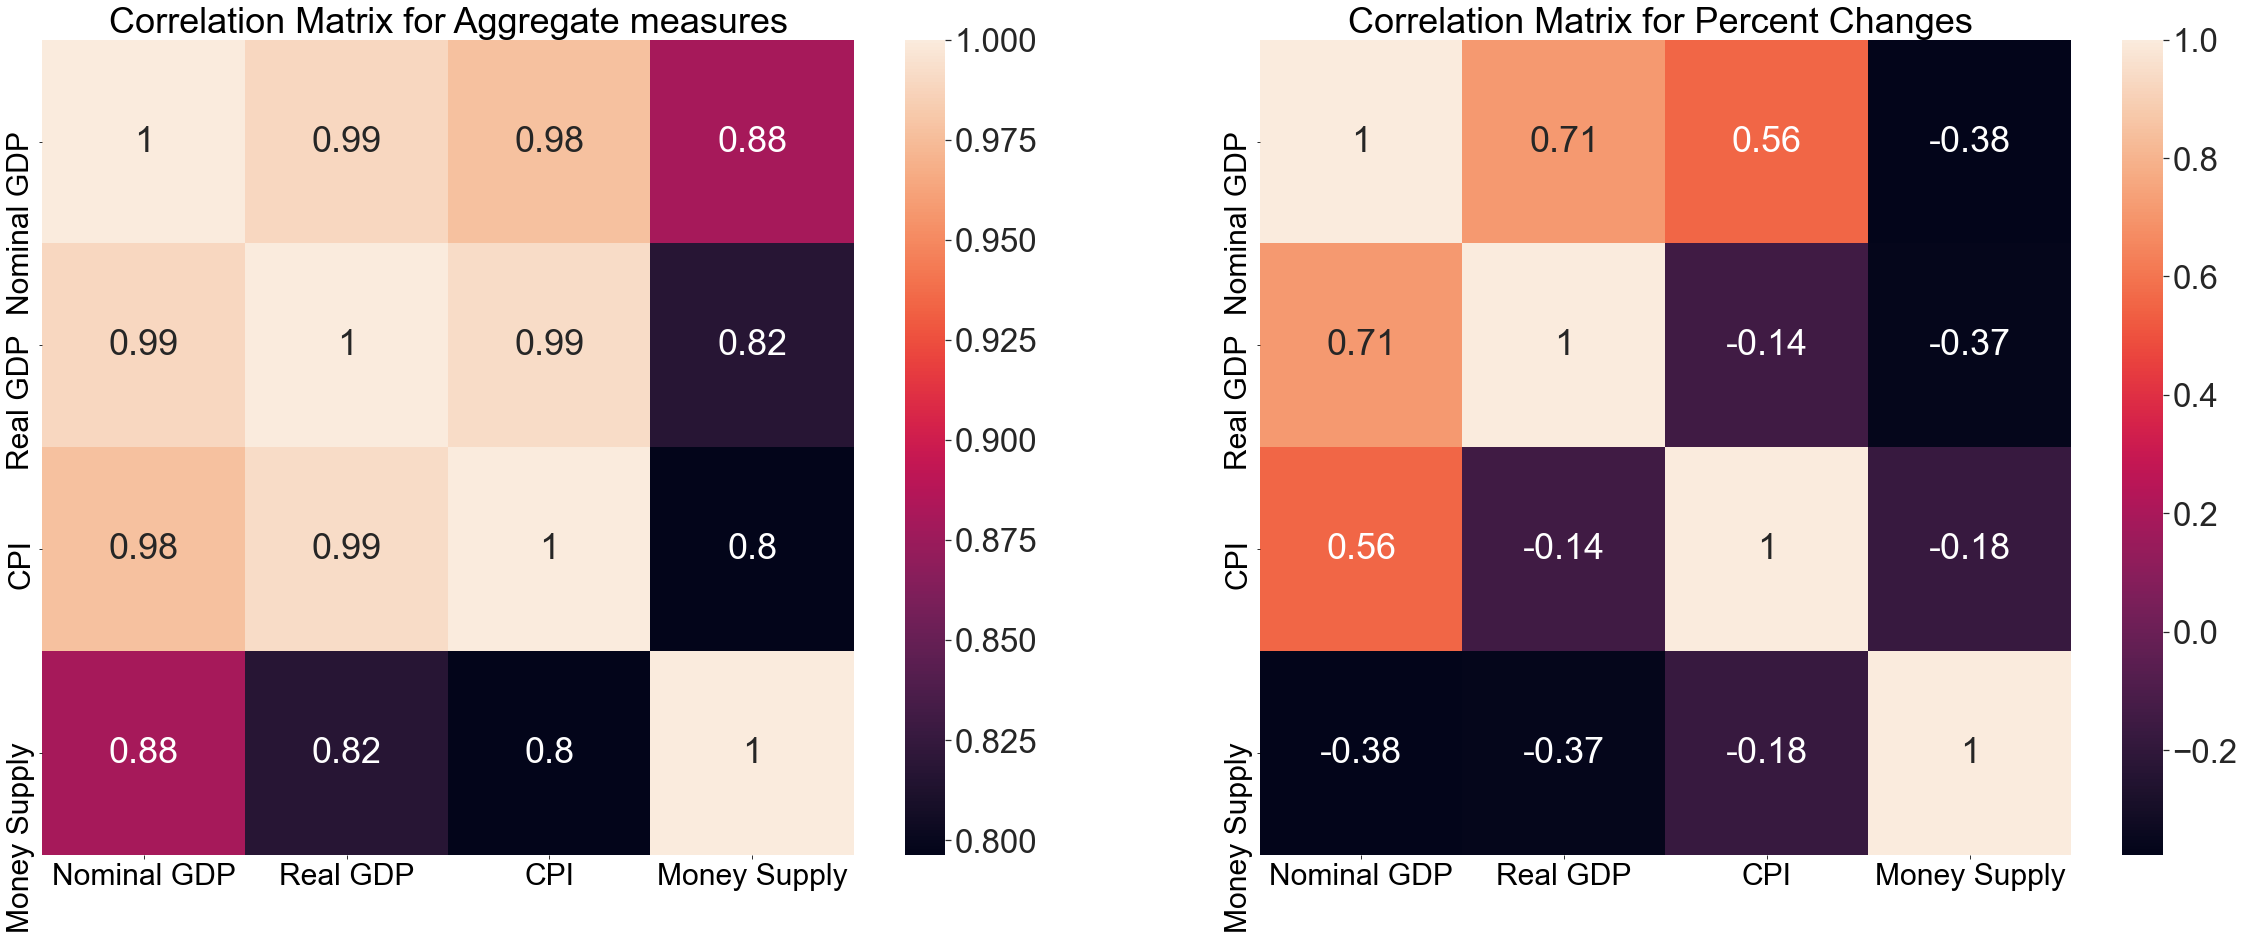

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (40,15))
sn.set(font_scale = 3)
sn.heatmap(econ_df.corr(), annot=True, ax = ax[0])
sn.heatmap(econ_df_pct_change.corr(), annot = True, ax = ax[1])
ax[0].set_title('Correlation Matrix for Aggregate measures')
ax[1].set_title('Correlation Matrix for Percent Changes ')

These plots reveal some intersting findings. The percentage changes are generally less correlated than the aggregate measures, which makes sense. Since the aggregate meausres are extremely likely to follow an upward tradjectory over time, they will be positively correlated. The year to year percent changes do not follow this tradjectory, so these measures paint a better picture of how each measure effects the others. INcreases in MOney supply moderatedly lower CPI. CPI is actually negatively correlated withchanges in Real GDP, but positively correlated with changes in nom GDP. If the money supply chnages a lot in a given year, GDP will be negatively affected. There are more observations to be made, but I will leave those to the reader. 